In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Specify style of seaborn visualizations
sns.set(style="darkgrid")

# Importing and Cleaning Data

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.shape

(2237, 19)

In [6]:
data.head()

,Series Name,Series Code,Country Name,Country Code,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Turkey,TUR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
1,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,United States,USA,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
2,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Netherlands,NLD,64,66,66,68,70,71,73,74,75,76,77,78,79,80,..
3,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,China,CHN,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,"Access to anti-retroviral drugs, male (%)",SH.HIV.ARTC.MA.ZS,Turkey,TUR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


There are more than 500 indicators. My plan for this study is to use 25 indicators to compare 4 different countries in different continents. Each indicator has a code so I will create list of the indicators that will be used. Then, I will filter out the dataframe to include only these indicators.

In [7]:
code_list = ['SL.FAM.WORK.FE.ZS','SL.FAM.WORK.MA.ZS','IC.REG.COST.PC.FE.ZS','IC.REG.COST.PC.MA.ZS',
             'SP.DYN.CDRT.IN','SL.AGR.EMPL.FE.ZS','SL.AGR.EMPL.MA.ZS','SL.IND.EMPL.FE.ZS',
             'SL.IND.EMPL.MA.ZS','SL.SRV.EMPL.FE.ZS','SL.SRV.EMPL.MA.ZS','SE.TER.GRAD.FE.SI.ZS',
             'SP.DYN.TFRT.IN','SL.TLF.ACTI.1524.FE.NE.ZS','SL.TLF.ACTI.1524.MA.NE.ZS',
             'SL.TLF.CACT.FE.NE.ZS','SL.TLF.CACT.MA.NE.ZS','SL.TLF.TOTL.FE.ZS','SP.DYN.LE00.FE.IN',
             'SP.DYN.LE00.MA.IN','SP.POP.0014.TO.ZS','SP.POP.1564.TO.ZS','SP.POP.65UP.TO.ZS',
             'SH.STA.OB18.FE.ZS','SH.STA.OB18.MA.ZS'
]

In [8]:
data.shape

(2237, 19)

In [9]:
mask = data['Series Code'].isin(code_list)
data1 = data[mask]

In [10]:
data1.shape

(100, 19)

We now have 20 attributes of 4 different countries for 15 years (2004-2018).

The column names can be simplified. For example the year columns include years twice.

In [12]:
data1.columns = ['series_name', 'series_code', 'country_name', 'country_code', '2004', '2005', '2006', '2007', 
                '2008', '2009', '2010', '2011','2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [13]:
#country name column can be dropped since country code clearly tells us the country
data1 = data1.drop('country_name', axis=1)

In [323]:
# ALways check your work 
data1.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
176,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,TUR,50.035,41.674000,35.081001,34.333,34.154999,34.498001,34.813,35.028000,33.209000,31.052,29.035000,27.789000,26.021999,25.535999
177,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,USA,0.116,0.116000,0.107000,0.134,0.113000,0.083000,0.102,0.102000,0.089000,0.083,0.077000,0.089000,0.075000,0.068000
178,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,NLD,0.860,0.965000,0.973000,0.921,0.772000,0.746000,1.074,1.013000,0.854000,0.788,0.810000,0.864000,0.711000,0.537000
179,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,CHN,31.021,30.033001,29.052999,28.062,27.143000,26.229000,25.362,24.514999,23.691999,22.896,22.134001,21.382999,20.674999,20.007000
180,"Contributing family workers, male (% of male e...",SL.FAM.WORK.MA.ZS,TUR,9.035,7.028000,5.336000,4.947,4.768000,5.277000,5.004,4.765000,4.520000,4.465,4.778000,4.444000,4.491000,4.433000


### Missing values

Handling missing values is a critical step in data cleaning. We first need to find the missing values and then decide how to handle them depending on the characteristics and properties of the data. There is not an optimal way to do this for all datasets. It will largely depend on the dataset.

In [236]:
data1.isna().any().sum()

0

Although the count of missing values is our dataset is zero, I know there are missing values in the dataset. There are some values with '..' values which are actually missing values but could not be detected by pandas. It is very important to also visually check the datasets. I will replace these values with NaN.

In [19]:
data1.replace('..', np.nan, inplace=True)

In [21]:
data1.isna().sum()

series_name      0
series_code      0
country_code     0
2004            10
2005             9
2006            10
2007            10
2008            10
2009            10
2010             5
2011            10
2012            10
2013             6
2014             5
2015             7
2016             7
2017            16
2018            40
dtype: int64

2018 columns contains 40 NaN out of 100 total values so I will drop the whole column.

In [22]:
data1 = data1.drop('2018', axis=1)

As expected, missing values are mostly in the same rows. Certain attributes do not have any values for a particular country which causes most of the values in a row to be NaN. So I will drop rows based on a threshold of NaN values in that row. 

In [23]:
# 14 years (2004-2017) with 70 % threshold
data1 = data1.dropna(thresh=14*0.7, axis='rows')

In [24]:
data1.isna().sum()

series_name      0
series_code      0
country_code     0
2004             1
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             1
2014             0
2015             1
2016             1
2017            10
dtype: int64

In [25]:
data1.shape

(90, 17)

There are 14 missing values left. It is acceptible to fill these values with the value of a previous year of the same country which will not effect the result very much. To do this, I will use ffill method on rows.

In [26]:
data1 = data1.fillna(method='ffill', axis=0)

In [27]:
data1.isna().sum().sum()

0

In [28]:
data1.columns

Index(['series_name', 'series_code', 'country_code', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

The datatypes of the values are object which is not appropriate for numerical analysis. Therefore, I need to change the datatypes of numerical columns.

In [29]:
years = ['2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017']
for year in years:
    data1 = data1.astype({year:'float'})

In [30]:
data1.dtypes

series_name      object
series_code      object
country_code     object
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
dtype: object

In [31]:
data1.columns

Index(['series_name', 'series_code', 'country_code', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [34]:
data1.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
176,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,TUR,50.035,41.674000,35.081001,34.333,34.154999,34.498001,34.813,35.028000,33.209000,31.052,29.035000,27.789000,26.021999,25.535999
177,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,USA,0.116,0.116000,0.107000,0.134,0.113000,0.083000,0.102,0.102000,0.089000,0.083,0.077000,0.089000,0.075000,0.068000
178,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,NLD,0.860,0.965000,0.973000,0.921,0.772000,0.746000,1.074,1.013000,0.854000,0.788,0.810000,0.864000,0.711000,0.537000
179,"Contributing family workers, female (% of fema...",SL.FAM.WORK.FE.ZS,CHN,31.021,30.033001,29.052999,28.062,27.143000,26.229000,25.362,24.514999,23.691999,22.896,22.134001,21.382999,20.674999,20.007000
180,"Contributing family workers, male (% of male e...",SL.FAM.WORK.MA.ZS,TUR,9.035,7.028000,5.336000,4.947,4.768000,5.277000,5.004,4.765000,4.520000,4.465,4.778000,4.444000,4.491000,4.433000


In [36]:
data1.series_name.value_counts()

Prevalence of obesity, female (% of female population ages 18+)                                                    4
Life expectancy at birth, female (years)                                                                           4
Employment in services, female (% of female employment) (modeled ILO estimate)                                     4
Fertility rate, total (births per woman)                                                                           4
Population ages 15-64 (% of total)                                                                                 4
Employment in industry, male (% of male employment) (modeled ILO estimate)                                         4
Employment in agriculture, female (% of female employment) (modeled ILO estimate)                                  4
Contributing family workers, female (% of female employment) (modeled ILO estimate)                                4
Employment in industry, female (% of female employment) (modeled

My analysis aims to compare 4 different countries based on 25 different attributes for a period of 15 years. Due to unavailable data, I have dropped some columns and rows. After dropping these rows and columns, some attributes do not have data for all 4 countries. In order to have a complete and thorough analysis, I will only use attributes which have data for all 4 countries.

In [37]:
attributes = data1.series_name.value_counts() == 4


In [38]:
# Filter attributes with 4 values 
attributes = attributes[attributes.values == True]

In [39]:
attributes

Prevalence of obesity, female (% of female population ages 18+)                        True
Life expectancy at birth, female (years)                                               True
Employment in services, female (% of female employment) (modeled ILO estimate)         True
Fertility rate, total (births per woman)                                               True
Population ages 15-64 (% of total)                                                     True
Employment in industry, male (% of male employment) (modeled ILO estimate)             True
Employment in agriculture, female (% of female employment) (modeled ILO estimate)      True
Contributing family workers, female (% of female employment) (modeled ILO estimate)    True
Employment in industry, female (% of female employment) (modeled ILO estimate)         True
Prevalence of obesity, male (% of male population ages 18+)                            True
Population ages 65 and above (% of total)                                       

In [40]:
attributes_list = list(attributes.index)

In [41]:
attributes_list

['Prevalence of obesity, female (% of female population ages 18+)',
 'Life expectancy at birth, female (years)',
 'Employment in services, female (% of female employment) (modeled ILO estimate)',
 'Fertility rate, total (births per woman)',
 'Population ages 15-64 (% of total)',
 'Employment in industry, male (% of male employment) (modeled ILO estimate)',
 'Employment in agriculture, female (% of female employment) (modeled ILO estimate)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Employment in industry, female (% of female employment) (modeled ILO estimate)',
 'Prevalence of obesity, male (% of male population ages 18+)',
 'Population ages 65 and above (% of total)',
 'Labor force, female (% of total labor force)',
 'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
 'Employment in services, male (% of male employment) (modeled ILO estimate)',
 'Life expectancy at birth, male (years)',
 'Population ages 0

In [42]:
mask1 = data1['series_name'].isin(attributes_list)
data1 = data1[mask1]

In [43]:
data1.shape

(72, 17)

We now have 18 attributes for 4 different countries for a period of 14 years.

# Exploratory Data Analysis

## Employment

The employment attributes indicate the labor force occupation of males and females. Labor force is divided into three occupations: agriculture, service and industry. I will filter these attributes using the description in series_name column.

In [44]:
employment = data1[data1.series_name.str.contains('Employment')]

In [45]:
employment.shape

(24, 17)

In [234]:
employment.head()

,series_name,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,field,gender
336,"Employment in agriculture, female (% of female...",TUR,50.743000,47.362000,43.541000,42.598000,40.112000,37.790001,39.200001,39.266998,37.095001,35.556999,32.765999,30.999001,28.589001,28.201,AGR,FE
337,"Employment in agriculture, female (% of female...",USA,0.776000,0.750000,0.740000,0.659000,0.682000,0.677000,0.735000,0.771000,0.764000,0.673000,0.699000,0.742000,0.775000,0.767,AGR,FE
338,"Employment in agriculture, female (% of female...",NLD,2.135000,2.176000,2.078000,1.882000,1.769000,1.714000,1.839000,1.633000,1.609000,1.238000,1.395000,1.508000,1.384000,1.462,AGR,FE
339,"Employment in agriculture, female (% of female...",CHN,43.821999,41.728001,39.542999,37.765999,36.585999,35.125999,33.752998,31.907000,30.750999,28.643999,26.827999,25.969999,25.117001,24.438,AGR,FE
340,"Employment in agriculture, male (% of male emp...",TUR,21.421000,19.225000,17.136999,16.652000,16.816000,17.143999,17.391001,17.843000,17.723000,17.353001,15.987000,15.663000,15.363000,15.297,AGR,MA


6 attributes for 4 countries:
Employment in (agriculture, service, industry) for (male, female)

I will try to make series codes more informative and drop series_name columns so that it will be easier to analysize and make visualizations. For ex, SL.AGR.EMPL.FE.ZS means employment in agriculture (female). I will export AGR and FE from this code and make separate columns. 

In [47]:
split1 = employment.series_code.str.split(".", expand=True)

In [48]:
split1.shape

(24, 5)

In [49]:
employment = pd.concat([employment, split1], axis=1)

In [50]:
employment.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,0,1,2,3,4
336,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,TUR,50.743000,47.362000,43.541000,42.598000,40.112000,37.790001,39.200001,...,35.556999,32.765999,30.999001,28.589001,28.201,SL,AGR,EMPL,FE,ZS
337,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,USA,0.776000,0.750000,0.740000,0.659000,0.682000,0.677000,0.735000,...,0.673000,0.699000,0.742000,0.775000,0.767,SL,AGR,EMPL,FE,ZS
338,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,NLD,2.135000,2.176000,2.078000,1.882000,1.769000,1.714000,1.839000,...,1.238000,1.395000,1.508000,1.384000,1.462,SL,AGR,EMPL,FE,ZS
339,"Employment in agriculture, female (% of female...",SL.AGR.EMPL.FE.ZS,CHN,43.821999,41.728001,39.542999,37.765999,36.585999,35.125999,33.752998,...,28.643999,26.827999,25.969999,25.117001,24.438,SL,AGR,EMPL,FE,ZS
340,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,TUR,21.421000,19.225000,17.136999,16.652000,16.816000,17.143999,17.391001,...,17.353001,15.987000,15.663000,15.363000,15.297,SL,AGR,EMPL,MA,ZS


In [51]:
employment = employment.drop(['series_code', 0, 2, 4], axis=1)

In [52]:
employment.head()

,series_name,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,1,3
336,"Employment in agriculture, female (% of female...",TUR,50.743000,47.362000,43.541000,42.598000,40.112000,37.790001,39.200001,39.266998,37.095001,35.556999,32.765999,30.999001,28.589001,28.201,AGR,FE
337,"Employment in agriculture, female (% of female...",USA,0.776000,0.750000,0.740000,0.659000,0.682000,0.677000,0.735000,0.771000,0.764000,0.673000,0.699000,0.742000,0.775000,0.767,AGR,FE
338,"Employment in agriculture, female (% of female...",NLD,2.135000,2.176000,2.078000,1.882000,1.769000,1.714000,1.839000,1.633000,1.609000,1.238000,1.395000,1.508000,1.384000,1.462,AGR,FE
339,"Employment in agriculture, female (% of female...",CHN,43.821999,41.728001,39.542999,37.765999,36.585999,35.125999,33.752998,31.907000,30.750999,28.643999,26.827999,25.969999,25.117001,24.438,AGR,FE
340,"Employment in agriculture, male (% of male emp...",TUR,21.421000,19.225000,17.136999,16.652000,16.816000,17.143999,17.391001,17.843000,17.723000,17.353001,15.987000,15.663000,15.363000,15.297,AGR,MA


In [53]:
employment.rename(columns={1:'field', 3:'gender'}, inplace=True)

In [54]:
employment.columns

Index(['series_name', 'country_code', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       'field', 'gender'],
      dtype='object')

In [55]:
employment_new = employment.drop('series_name', axis=1)

In [56]:
employment_new.head()

,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,field,gender
336,TUR,50.743000,47.362000,43.541000,42.598000,40.112000,37.790001,39.200001,39.266998,37.095001,35.556999,32.765999,30.999001,28.589001,28.201,AGR,FE
337,USA,0.776000,0.750000,0.740000,0.659000,0.682000,0.677000,0.735000,0.771000,0.764000,0.673000,0.699000,0.742000,0.775000,0.767,AGR,FE
338,NLD,2.135000,2.176000,2.078000,1.882000,1.769000,1.714000,1.839000,1.633000,1.609000,1.238000,1.395000,1.508000,1.384000,1.462,AGR,FE
339,CHN,43.821999,41.728001,39.542999,37.765999,36.585999,35.125999,33.752998,31.907000,30.750999,28.643999,26.827999,25.969999,25.117001,24.438,AGR,FE
340,TUR,21.421000,19.225000,17.136999,16.652000,16.816000,17.143999,17.391001,17.843000,17.723000,17.353001,15.987000,15.663000,15.363000,15.297,AGR,MA


Years listed as columns are not convenient for analysis and making visualizations. Therefore, I will create a year column and list all years as a row item. Pandas has built in melt function to do this task.

In [57]:
employment_new = employment_new.melt(id_vars=['country_code', 'field', 'gender'],
                   var_name='year',
                   value_name='employment')

In [58]:
print(employment_new.shape)
employment_new.head()

(336, 5)


,country_code,field,gender,year,employment
0,TUR,AGR,FE,2004,50.743000
1,USA,AGR,FE,2004,0.776000
2,NLD,AGR,FE,2004,2.135000
3,CHN,AGR,FE,2004,43.821999
4,TUR,AGR,MA,2004,21.421000


### Occupations

Let's check how the share of each occupation changed overtime for both males and females.

In [59]:
# Create masks to filter employment dataframe
mask00 = (employment_new.field == 'AGR') & (employment_new.gender == 'MA')
mask01 = (employment_new.field == 'AGR') & (employment_new.gender == 'FE')
mask10 = (employment_new.field == 'SRV') & (employment_new.gender == 'MA')
mask11 = (employment_new.field == 'SRV') & (employment_new.gender == 'FE')
mask20 = (employment_new.field == 'IND') & (employment_new.gender == 'MA')
mask21 = (employment_new.field == 'IND') & (employment_new.gender == 'FE')

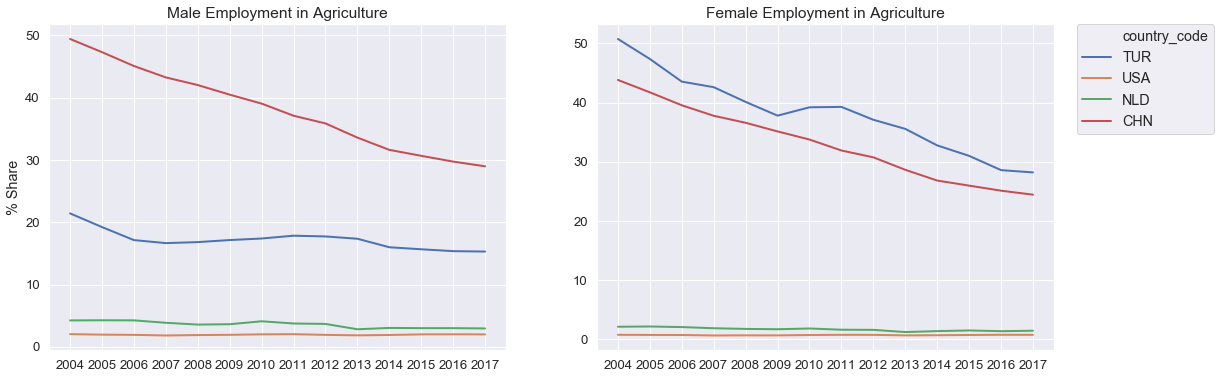

In [284]:
fig, axs = plt.subplots(ncols=2, figsize=(18,6))
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.})
sns.lineplot(x='year', y='employment', hue='country_code', data=employment_new[mask00], legend=False, ax=axs[0])
axs[0].set_title('Male Employment in Agriculture')
axs[0].set_ylabel('% Share')
axs[0].set_xlabel('')
sns.lineplot(x='year', y='employment', hue='country_code', data=employment_new[mask01], ax=axs[1])
axs[1].set_title('Female Employment in Agriculture')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


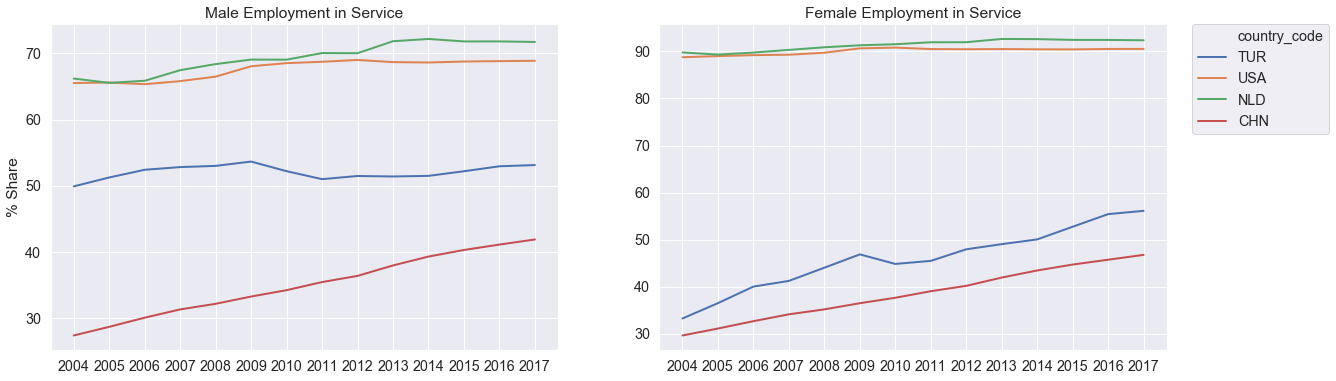

In [329]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.lineplot(x='year', y='employment', hue='country_code', data=employment_new[mask10], legend=False, ax=axs[0])
axs[0].set_title('Male Employment in Service')
axs[0].set_ylabel('% Share')
axs[0].set_xlabel('')
sns.lineplot(x='year', y='employment', hue='country_code', data=employment_new[mask11], ax=axs[1])
axs[1].set_title('Female Employment in Service')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

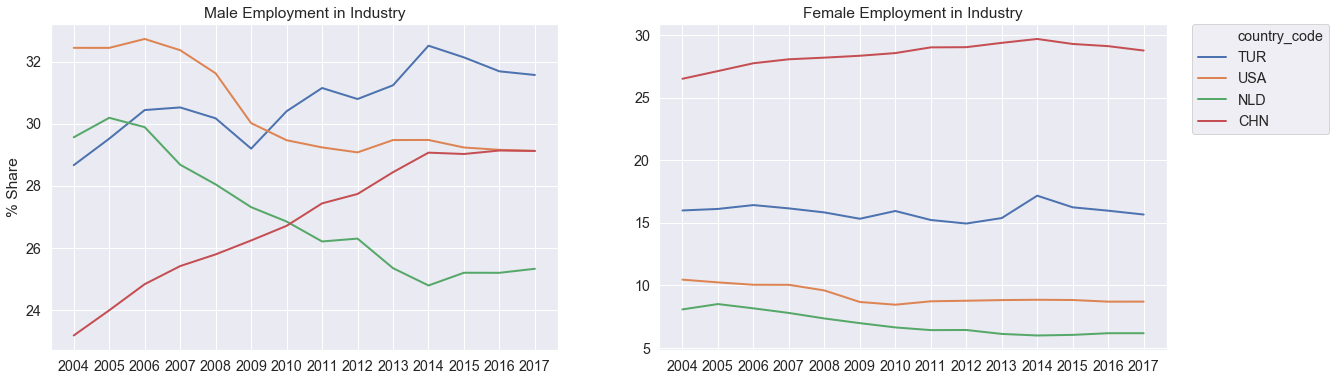

In [328]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))
sns.lineplot(x='year', y='employment', hue='country_code', data=employment_new[mask20], legend=False, ax=axs[0])
axs[0].set_title('Male Employment in Industry')
axs[0].set_ylabel('% Share')
axs[0].set_xlabel('')
sns.lineplot(x='year', y='employment', hue='country_code', data=employment_new[mask21], ax=axs[1])
axs[1].set_title('Female Employment in Industry')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Countries

The trends in each country may be realized more easily if each occupation and gender is shown on the same graph.

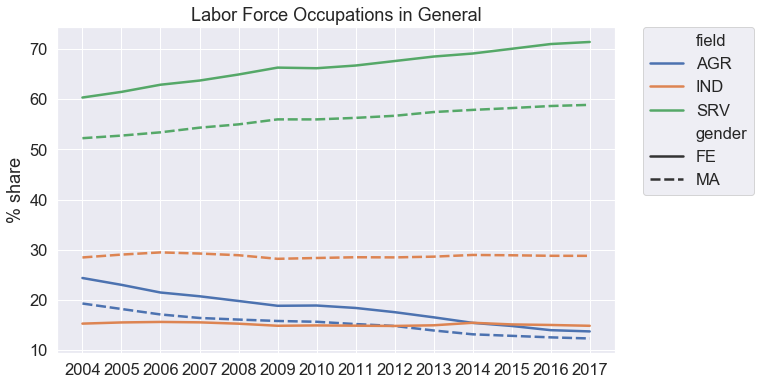

In [272]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='employment', hue='field', style='gender', ci=None, data=employment_new)
ax.set_title('Labor Force Occupations in General')
ax.set_xlabel('')
ax.set_ylabel('% share')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

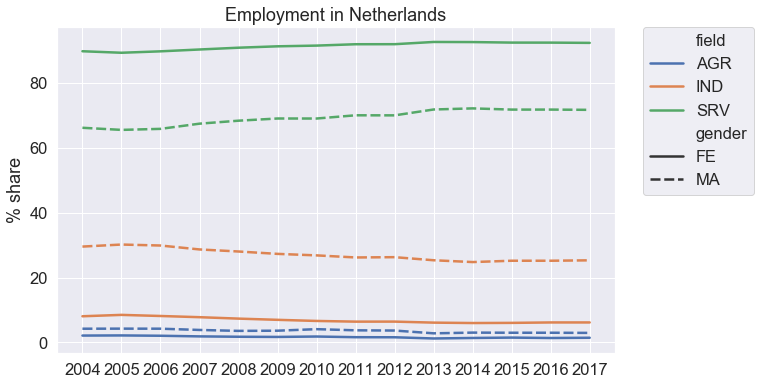

In [266]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
maskNLD = employment_new.country_code == 'NLD'
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='employment', hue='field', style='gender', data=employment_new[maskNLD])
ax.set_title('Employment in Netherlands')
ax.set_xlabel('')
ax.set_ylabel('% share')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

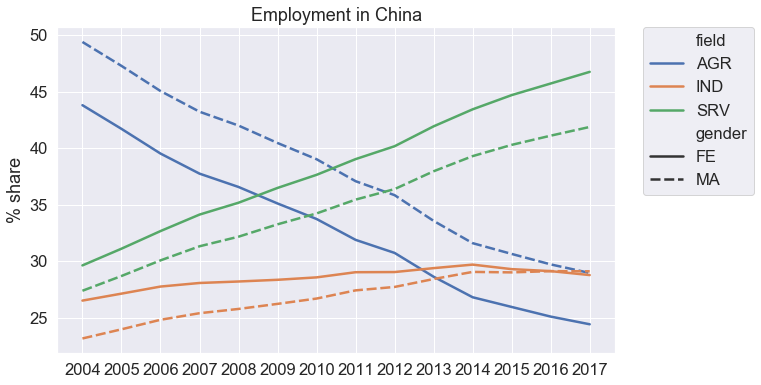

In [267]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
maskCHN = employment_new.country_code == 'CHN'
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='employment', hue='field', style='gender', data=employment_new[maskCHN])
ax.set_title('Employment in China')
ax.set_xlabel('')
ax.set_ylabel('% share')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

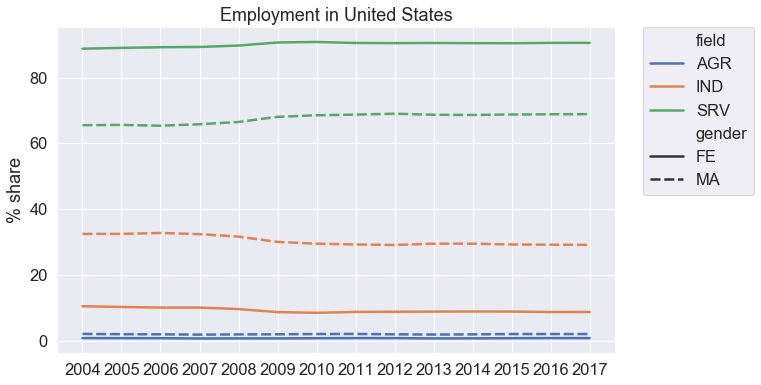

In [268]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
maskUSA = employment_new.country_code == 'USA'
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='employment', hue='field', style='gender', data=employment_new[maskUSA])
ax.set_title('Employment in United States')
ax.set_xlabel('')
ax.set_ylabel('% share')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

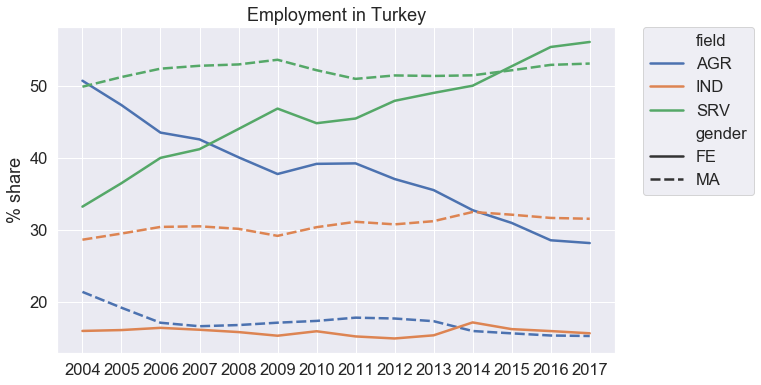

In [269]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
maskTUR = employment_new.country_code == 'TUR'
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='employment', hue='field', style='gender', data=employment_new[maskTUR])
ax.set_title('Employment in Turkey')
ax.set_xlabel('')
ax.set_ylabel('% share')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In Turkey, the distribution of male employment types did not change a lot between 2004 and 2017. However, female jobs shifted from agriculture to service. Women in industry are a lot lower than women in service and agriculture.

## Obesity

I will filter attributes related to obesity using the description in series_name column.

In [66]:
obesity = data1[data1.series_name.str.contains('obesity')]

In [67]:
obesity

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1268,"Prevalence of obesity, female (% of female pop...",SH.STA.OB18.FE.ZS,TUR,31.6,32.2,32.9,33.5,34.1,34.8,35.4,36.0,36.7,37.3,37.9,38.6,39.2,10.34512
1269,"Prevalence of obesity, female (% of female pop...",SH.STA.OB18.FE.ZS,USA,29.6,30.2,30.9,31.5,32.1,32.7,33.3,33.9,34.5,35.1,35.7,36.4,37.0,10.34512
1270,"Prevalence of obesity, female (% of female pop...",SH.STA.OB18.FE.ZS,NLD,15.5,16.0,16.4,16.8,17.2,17.6,17.9,18.3,18.7,19.0,19.3,19.7,20.0,10.34512
1271,"Prevalence of obesity, female (% of female pop...",SH.STA.OB18.FE.ZS,CHN,3.6,3.8,4.0,4.3,4.5,4.7,5.0,5.2,5.5,5.7,6.0,6.2,6.5,10.34512
1272,"Prevalence of obesity, male (% of male populat...",SH.STA.OB18.MA.ZS,TUR,16.5,17.1,17.7,18.3,18.9,19.6,20.2,20.9,21.5,22.2,22.9,23.6,24.4,10.34512
1273,"Prevalence of obesity, male (% of male populat...",SH.STA.OB18.MA.ZS,USA,27.0,27.7,28.4,29.1,29.8,30.5,31.2,31.9,32.6,33.3,34.0,34.7,35.5,10.34512
1274,"Prevalence of obesity, male (% of male populat...",SH.STA.OB18.MA.ZS,NLD,14.0,14.6,15.1,15.7,16.3,16.8,17.4,18.0,18.5,19.1,19.7,20.2,20.8,10.34512
1275,"Prevalence of obesity, male (% of male populat...",SH.STA.OB18.MA.ZS,CHN,2.4,2.6,2.9,3.1,3.3,3.6,3.9,4.2,4.5,4.8,5.1,5.5,5.9,10.34512


In [68]:
obesity.series_code[0:4] = 'FE'
obesity.series_code[4:9] = 'MA'

C:\Users\soner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\soner\Anaconda3\lib\site-packages\pandas\core\series.py:1035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
C:\Users\soner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Use

In [69]:
obesity

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1268,"Prevalence of obesity, female (% of female pop...",FE,TUR,31.6,32.2,32.9,33.5,34.1,34.8,35.4,36.0,36.7,37.3,37.9,38.6,39.2,10.34512
1269,"Prevalence of obesity, female (% of female pop...",FE,USA,29.6,30.2,30.9,31.5,32.1,32.7,33.3,33.9,34.5,35.1,35.7,36.4,37.0,10.34512
1270,"Prevalence of obesity, female (% of female pop...",FE,NLD,15.5,16.0,16.4,16.8,17.2,17.6,17.9,18.3,18.7,19.0,19.3,19.7,20.0,10.34512
1271,"Prevalence of obesity, female (% of female pop...",FE,CHN,3.6,3.8,4.0,4.3,4.5,4.7,5.0,5.2,5.5,5.7,6.0,6.2,6.5,10.34512
1272,"Prevalence of obesity, male (% of male populat...",MA,TUR,16.5,17.1,17.7,18.3,18.9,19.6,20.2,20.9,21.5,22.2,22.9,23.6,24.4,10.34512
1273,"Prevalence of obesity, male (% of male populat...",MA,USA,27.0,27.7,28.4,29.1,29.8,30.5,31.2,31.9,32.6,33.3,34.0,34.7,35.5,10.34512
1274,"Prevalence of obesity, male (% of male populat...",MA,NLD,14.0,14.6,15.1,15.7,16.3,16.8,17.4,18.0,18.5,19.1,19.7,20.2,20.8,10.34512
1275,"Prevalence of obesity, male (% of male populat...",MA,CHN,2.4,2.6,2.9,3.1,3.3,3.6,3.9,4.2,4.5,4.8,5.1,5.5,5.9,10.34512


In [70]:
obesity = obesity.drop('series_name', axis=1)

In [71]:
obesity = obesity.drop('2017', axis=1)

In [72]:
obesity = obesity.rename(columns={'series_code':'gender'})

In [73]:
obesity.head()

,gender,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1268,FE,TUR,31.6,32.2,32.9,33.5,34.1,34.8,35.4,36.0,36.7,37.3,37.9,38.6,39.2
1269,FE,USA,29.6,30.2,30.9,31.5,32.1,32.7,33.3,33.9,34.5,35.1,35.7,36.4,37.0
1270,FE,NLD,15.5,16.0,16.4,16.8,17.2,17.6,17.9,18.3,18.7,19.0,19.3,19.7,20.0
1271,FE,CHN,3.6,3.8,4.0,4.3,4.5,4.7,5.0,5.2,5.5,5.7,6.0,6.2,6.5
1272,MA,TUR,16.5,17.1,17.7,18.3,18.9,19.6,20.2,20.9,21.5,22.2,22.9,23.6,24.4


In [74]:
obesity = obesity.melt(id_vars=['country_code', 'gender'],
                   var_name='year',
                   value_name='share')

In [216]:
obesity.shape

(104, 4)

In [75]:
obesity.head()

,country_code,gender,year,share
0,TUR,FE,2004,31.6
1,USA,FE,2004,29.6
2,NLD,FE,2004,15.5
3,CHN,FE,2004,3.6
4,TUR,MA,2004,16.5


Text(0, 0.5, '% share')

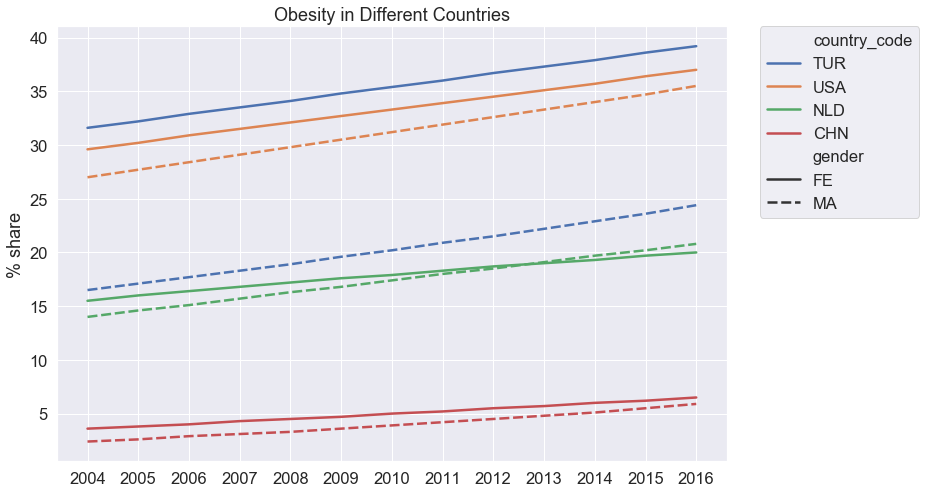

In [290]:
plt.figure(figsize=(12,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.lineplot(x='year', y='share', hue='country_code', style='gender', data=obesity)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Obesity in Different Countries')
ax.set_xlabel('')
ax.set_ylabel('% share')

## Age distribution, life expectancy, fertility rate and death rate

Just like obesity and employment, I will filter attributes using the description in series_name column and combine different dataframes based on year and country columns using pandas merge() function.

In [76]:
population = data1[data1.series_name.str.contains('Population')]
population.shape

(12, 17)

In [77]:
population.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1200,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,TUR,28.973794,28.599979,28.212547,27.868182,27.546418,27.224351,26.901881,26.638077,26.380821,26.127266,25.866380,25.583451,25.302043,24.957258
1201,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,USA,21.099445,20.880227,20.810377,20.676285,20.505072,20.333406,20.172455,19.988477,19.780939,19.571647,19.379071,19.212860,19.028231,18.913107
1202,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,NLD,18.395785,18.320358,18.250891,18.097346,17.894536,17.694522,17.522247,17.331706,17.185477,17.062484,16.924405,16.755611,16.591354,16.413543
1203,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,CHN,20.743436,19.891756,19.268574,18.750048,18.354313,18.060775,17.848216,17.701947,17.648843,17.658288,17.681217,17.685593,17.700545,17.676773
1208,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,TUR,64.454705,64.722266,65.001791,65.242539,65.460856,65.676078,65.886421,66.053702,66.211906,66.356280,66.487812,66.614794,66.733739,66.890231


In [78]:
split2 = population.series_code.str.split(".", expand=True)

In [79]:
population['ages'] = split2[2]

C:\Users\soner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
population.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,ages
1200,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,TUR,28.973794,28.599979,28.212547,27.868182,27.546418,27.224351,26.901881,26.638077,26.380821,26.127266,25.866380,25.583451,25.302043,24.957258,0014
1201,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,USA,21.099445,20.880227,20.810377,20.676285,20.505072,20.333406,20.172455,19.988477,19.780939,19.571647,19.379071,19.212860,19.028231,18.913107,0014
1202,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,NLD,18.395785,18.320358,18.250891,18.097346,17.894536,17.694522,17.522247,17.331706,17.185477,17.062484,16.924405,16.755611,16.591354,16.413543,0014
1203,Population ages 0-14 (% of total),SP.POP.0014.TO.ZS,CHN,20.743436,19.891756,19.268574,18.750048,18.354313,18.060775,17.848216,17.701947,17.648843,17.658288,17.681217,17.685593,17.700545,17.676773,0014
1208,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,TUR,64.454705,64.722266,65.001791,65.242539,65.460856,65.676078,65.886421,66.053702,66.211906,66.356280,66.487812,66.614794,66.733739,66.890231,1564


In [81]:
population = population.drop(['series_name','series_code'], axis=1)

In [82]:
population.head()

,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,ages
1200,TUR,28.973794,28.599979,28.212547,27.868182,27.546418,27.224351,26.901881,26.638077,26.380821,26.127266,25.866380,25.583451,25.302043,24.957258,0014
1201,USA,21.099445,20.880227,20.810377,20.676285,20.505072,20.333406,20.172455,19.988477,19.780939,19.571647,19.379071,19.212860,19.028231,18.913107,0014
1202,NLD,18.395785,18.320358,18.250891,18.097346,17.894536,17.694522,17.522247,17.331706,17.185477,17.062484,16.924405,16.755611,16.591354,16.413543,0014
1203,CHN,20.743436,19.891756,19.268574,18.750048,18.354313,18.060775,17.848216,17.701947,17.648843,17.658288,17.681217,17.685593,17.700545,17.676773,0014
1208,TUR,64.454705,64.722266,65.001791,65.242539,65.460856,65.676078,65.886421,66.053702,66.211906,66.356280,66.487812,66.614794,66.733739,66.890231,1564


In [83]:
population = population.melt(id_vars=['country_code', 'ages'],
                   var_name='year',
                   value_name='share')

In [84]:
population.head()

,country_code,ages,year,share
0,TUR,0014,2004,28.973794
1,USA,0014,2004,21.099445
2,NLD,0014,2004,18.395785
3,CHN,0014,2004,20.743436
4,TUR,1564,2004,64.454705


In [85]:
life_exp = data1[data1.series_name.str.contains('expectancy')]
life_exp.shape

(8, 17)

In [86]:
life_exp.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
780,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,TUR,75.543,75.949,76.346,76.734,77.111,77.479,77.840,78.194,78.541,78.880,79.209,79.522,79.816,80.088
781,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,USA,80.100,80.100,80.300,80.600,80.600,80.900,81.000,81.100,81.200,81.200,81.300,81.200,81.100,81.100
782,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,NLD,81.400,81.600,81.900,82.300,82.300,82.700,82.700,83.100,83.000,83.200,83.500,83.200,83.200,83.200
783,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,CHN,74.535,74.845,75.170,75.508,75.855,76.208,76.566,76.926,77.284,77.635,77.972,78.288,78.574,78.828
784,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,TUR,68.579,69.004,69.410,69.822,70.255,70.716,71.199,71.694,72.181,72.644,73.075,73.470,73.826,74.149


In [87]:
split3 = life_exp.series_code.str.split('.', expand=True)

In [88]:
split3

,0,1,2,3,4
780,SP,DYN,LE00,FE,IN
781,SP,DYN,LE00,FE,IN
782,SP,DYN,LE00,FE,IN
783,SP,DYN,LE00,FE,IN
784,SP,DYN,LE00,MA,IN
785,SP,DYN,LE00,MA,IN
786,SP,DYN,LE00,MA,IN
787,SP,DYN,LE00,MA,IN


In [89]:
life_exp['gender'] = split3[3]

C:\Users\soner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
life_exp = life_exp.drop(['series_name', 'series_code'], axis=1)

In [91]:
life_exp

,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,gender
780,TUR,75.543,75.949,76.346,76.734,77.111,77.479,77.840,78.194,78.541,78.880,79.209,79.522,79.816,80.088,FE
781,USA,80.100,80.100,80.300,80.600,80.600,80.900,81.000,81.100,81.200,81.200,81.300,81.200,81.100,81.100,FE
782,NLD,81.400,81.600,81.900,82.300,82.300,82.700,82.700,83.100,83.000,83.200,83.500,83.200,83.200,83.200,FE
783,CHN,74.535,74.845,75.170,75.508,75.855,76.208,76.566,76.926,77.284,77.635,77.972,78.288,78.574,78.828,FE
784,TUR,68.579,69.004,69.410,69.822,70.255,70.716,71.199,71.694,72.181,72.644,73.075,73.470,73.826,74.149,MA
785,USA,75.000,75.000,75.200,75.500,75.600,76.000,76.200,76.300,76.400,76.400,76.500,76.300,76.100,76.100,MA
786,NLD,76.900,77.200,77.600,78.000,78.300,78.500,78.800,79.400,79.300,79.500,80.000,79.900,80.000,80.000,MA
787,CHN,71.013,71.297,71.551,71.788,72.017,72.244,72.476,72.720,72.976,73.242,73.517,73.793,74.061,74.315,MA


In [92]:
life_exp = life_exp.melt(id_vars=['country_code', 'gender'],
                        var_name='year',
                        value_name='expected_life' )

In [93]:
life_exp.head()

,country_code,gender,year,expected_life
0,TUR,FE,2004,75.543
1,USA,FE,2004,80.100
2,NLD,FE,2004,81.400
3,CHN,FE,2004,74.535
4,TUR,MA,2004,68.579


In [94]:
life_exp.shape

(112, 4)

In [96]:
population.head()

,country_code,ages,year,share
0,TUR,0014,2004,28.973794
1,USA,0014,2004,21.099445
2,NLD,0014,2004,18.395785
3,CHN,0014,2004,20.743436
4,TUR,1564,2004,64.454705


In [97]:
population_new = pd.merge(population, life_exp, on=['country_code','year'])

In [98]:
population_new.head(10)

,country_code,ages,year,share,gender,expected_life
0,TUR,0014,2004,28.973794,FE,75.543
1,TUR,0014,2004,28.973794,MA,68.579
2,TUR,1564,2004,64.454705,FE,75.543
3,TUR,1564,2004,64.454705,MA,68.579
4,TUR,65UP,2004,6.571432,FE,75.543
5,TUR,65UP,2004,6.571432,MA,68.579
6,USA,0014,2004,21.099445,FE,80.100
7,USA,0014,2004,21.099445,MA,75.000
8,USA,1564,2004,66.635709,FE,80.100
9,USA,1564,2004,66.635709,MA,75.000


Death rate and fertility rate

In [103]:
fertility = data1[data1.series_code == 'SP.DYN.TFRT.IN']

In [104]:
fertility

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
472,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,TUR,2.3100,2.273,2.240,2.213,2.189,2.168,2.151,2.1370,2.1260,2.1170,2.1090,2.1010,2.0920,2.0810
473,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,USA,2.0515,2.057,2.108,2.120,2.072,2.002,1.931,1.8945,1.8805,1.8575,1.8625,1.8435,1.8205,1.7655
474,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NLD,1.7200,1.710,1.720,1.720,1.770,1.790,1.790,1.7600,1.7200,1.6800,1.7100,1.6600,1.6600,1.6600
475,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,CHN,1.6080,1.612,1.615,1.617,1.620,1.623,1.627,1.6320,1.6390,1.6470,1.6560,1.6650,1.6750,1.6830


In [105]:
fertility = fertility.drop(['series_name','series_code'], axis=1)

In [106]:
fertility = fertility.melt(id_vars='country_code',
                          var_name='year',
                          value_name='fertility_rate')

In [107]:
fertility.head()

,country_code,year,fertility_rate
0,TUR,2004,2.3100
1,USA,2004,2.0515
2,NLD,2004,1.7200
3,CHN,2004,1.6080
4,TUR,2005,2.2730


In [108]:
population_new = pd.merge(population_new, fertility, on=['country_code','year'])

In [109]:
population_new.head()

,country_code,ages,year,share,gender,expected_life,fertility_rate
0,TUR,0014,2004,28.973794,FE,75.543,2.31
1,TUR,0014,2004,28.973794,MA,68.579,2.31
2,TUR,1564,2004,64.454705,FE,75.543,2.31
3,TUR,1564,2004,64.454705,MA,68.579,2.31
4,TUR,65UP,2004,6.571432,FE,75.543,2.31


In [110]:
death = data1[data1.series_code == 'SP.DYN.CDRT.IN']

In [111]:
death.head()

,series_name,series_code,country_code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
192,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,TUR,6.072,6.013,5.959,5.903,5.841,5.772,5.697,5.619,5.547,5.484,5.436,5.404,5.390,5.394
193,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,USA,8.200,8.300,8.100,8.000,8.100,7.900,7.995,8.073,8.102,8.215,8.237,8.440,8.493,8.500
194,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,NLD,8.400,8.400,8.300,8.100,8.200,8.100,8.200,8.100,8.400,8.400,8.300,8.700,8.700,8.800
195,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,CHN,6.420,6.510,6.810,6.930,7.060,7.080,7.110,7.140,7.150,7.160,7.160,7.110,7.090,7.110


In [112]:
death = death.drop(['series_name','series_code'], axis=1)

In [113]:
death = death.melt(id_vars='country_code',
                  var_name='year',
                  value_name='death_rate')

In [114]:
death.head()

,country_code,year,death_rate
0,TUR,2004,6.072
1,USA,2004,8.200
2,NLD,2004,8.400
3,CHN,2004,6.420
4,TUR,2005,6.013


In [115]:
population_new = pd.merge(population_new, death, on=['country_code','year'])

In [156]:
population_new.head()

,country_code,ages,year,share,gender,expected_life,fertility_rate,death_rate
0,TUR,0014,2004,28.973794,FE,75.543,2.31,6.072
1,TUR,0014,2004,28.973794,MA,68.579,2.31,6.072
2,TUR,1564,2004,64.454705,FE,75.543,2.31,6.072
3,TUR,1564,2004,64.454705,MA,68.579,2.31,6.072
4,TUR,65UP,2004,6.571432,FE,75.543,2.31,6.072


Fertility rate: Total fertility rate represents the number of children that would be born to a woman if she were to live to the end of her childbearing years and bear children in accordance with age-specific fertility rates of the specified year.

Death rate: Crude death rate indicates the number of deaths occurring during the year, per 1,000 population estimated at midyear. Subtracting the crude death rate from the crude birth rate provides the rate of natural increase, which is equal to the rate of population change in the absence of migration.


Text(0.5, 1.0, 'Population Distribution')

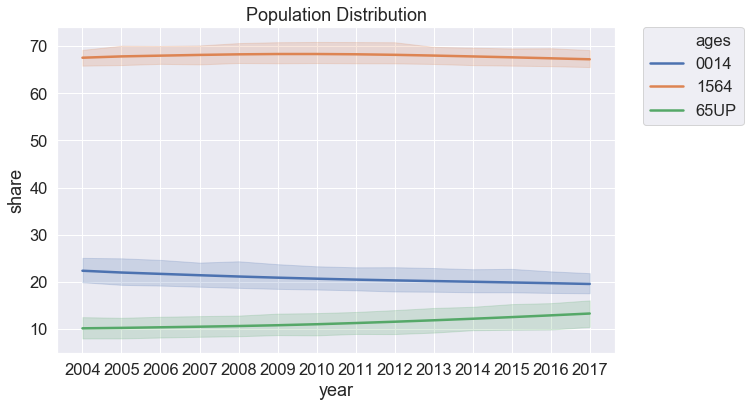

In [292]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='share', hue='ages', data=population_new)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Population Distribution')

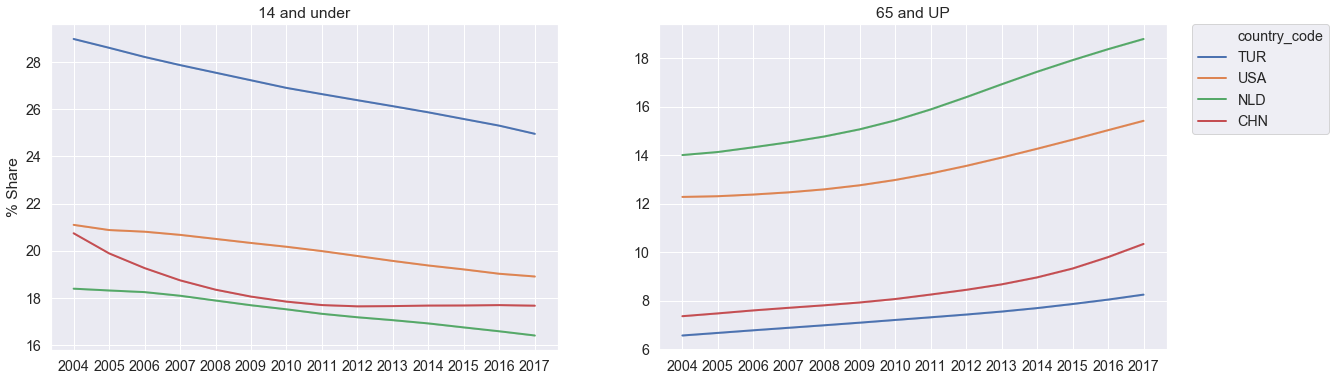

In [310]:
mask1 = population_new.ages == '0014'
mask2 = population_new.ages == '65UP'

fig, axs = plt.subplots(ncols=2, figsize=(20,6))

sns.lineplot(x='year', y='share', hue='country_code', data=population_new[mask1], legend=False, ax=axs[0])
axs[0].set_title('14 and under')
axs[0].set_ylabel('% Share')
axs[0].set_xlabel('')

sns.lineplot(x='year', y='share', hue='country_code', data=population_new[mask2], ax=axs[1])
axs[1].set_title('65 and UP')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

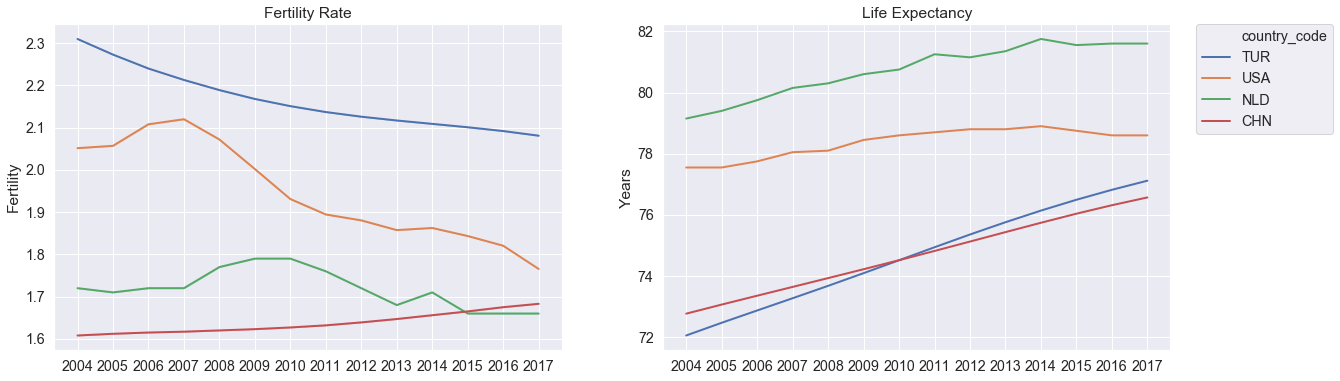

In [315]:
fig, axs = plt.subplots(ncols=2, figsize=(20,6))

sns.lineplot(x='year', y='fertility_rate', hue='country_code', data=population_new, legend=False, ax=axs[0])
axs[0].set_title('Fertility Rate')
axs[0].set_ylabel('Fertility')
axs[0].set_xlabel('')

sns.lineplot(x='year', y='expected_life', hue='country_code', ci=None, data=population_new, ax=axs[1])
axs[1].set_title('Life Expectancy')
axs[1].set_ylabel('Years')
axs[1].set_xlabel('')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

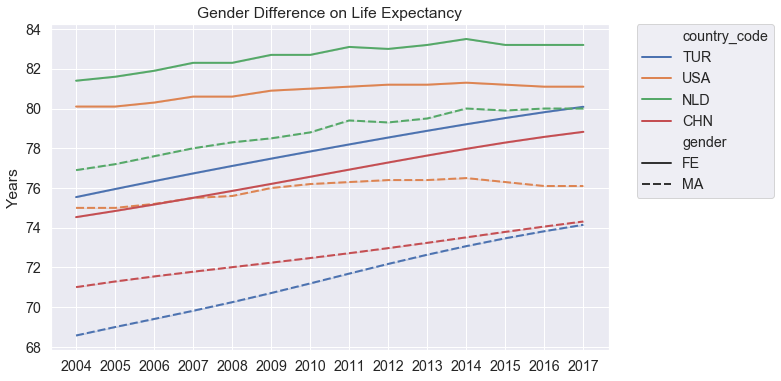

In [322]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='year', y='expected_life', hue='country_code', style='gender',
             data=population_new)
ax.set_title('Gender Difference on Life Expectancy')
ax.set_ylabel('Years')
ax.set_xlabel('')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It is safe to say that women live longer than men in general. 